2019-10-12T18:21:15Z

In [1]:
import obspy
import numpy as np
import math
import cmath
import serveobspy
from obspy import UTCDateTime, read, Trace, Stream
import dragrace
import SeismogramTasks as sTasks
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib
%matplotlib inline

import serveobspy
import dragrace

In [5]:
serveSeis = serveobspy.ServeObsPy('www')
serveSeis.serveData()

http server started at http://127.0.0.1:8000
websocket server started ws://127.0.0.1:8001


This is a Top Fuel Race Q3 Heat 5 in Fall 2019 that showed large ground acceleration at the station NL especially in the X component.

In [2]:
#start = '2019-10-12T18:21:15Z' # FALL Winning race TF Q3 Heat 5
'2019-10-12T21:44:29Z' # FALL Funny car  Heat 6 Q4
'2019-10-12T21:15:33Z ' # FALL Top Fuel Heat 5 Q4
'2019-10-12T18:32:12Z'# FALL Top Fuel Q3 Heat 9
#start = '2019-04-28T18:24:28Z'
start = '2019-10-12T18:18:30Z' # Funny Car Q4 Heat 4

In [8]:
from obspy import read
# FL0 FL NL FL60 FL330 FL660 FL1K

stx = read("./fallClean/Corrected/FAr_FL660_" + start + "_HNX.mseed")
st = read("./fallClean/Corrected/FAr_FL660_" + start + "_HNY.mseed")
stz = read("./fallClean/Corrected/FAr_FL660_" + start + "_HNZ.mseed")

In [7]:
serveSeis.stream=sty


127.0.0.1 - - [26/Apr/2020 20:36:08] "GET /dataset HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 20:36:08] "GET /seismograms/4584479152/mseed HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 20:36:08] "GET /seismograms/4584479152/stats HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 20:36:08] "GET /dataset HTTP/1.1" 200 -


In [58]:
#start = '2019-04-28T18:24:28Z'
#start = '2019-04-28T18:24:43.9Z'
start = '2019-10-12T18:18:30Z' # Funny Car Q4 Heat 4
st  = dragrace.getMseed(start, 0.5, staList=['NL'], chanList=['HNX','HNY','HNZ'])

getDragrace Fall2019 2019-10-12T18:18:52.300000Z  2019-10-12T18:18:52.400000Z
station: FL660
channel: HNX
http://www.seis.sc.edu/dragdata/Fall2019/mseed/XX/FL660/2019/285/XX.FL660.00.HNX.2019.285.18
channel: HNY
http://www.seis.sc.edu/dragdata/Fall2019/mseed/XX/FL660/2019/285/XX.FL660.00.HNY.2019.285.18
channel: HNZ
http://www.seis.sc.edu/dragdata/Fall2019/mseed/XX/FL660/2019/285/XX.FL660.00.HNZ.2019.285.18


In [59]:
serveSeis.stream = st

127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /dataset HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /seismograms/4816296032/mseed HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /seismograms/4816296032/stats HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /seismograms/4816296648/mseed HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /seismograms/4816296648/stats HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /seismograms/4816295696/mseed HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:49] "GET /seismograms/4816295696/stats HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:55] "GET /dataset HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:55] "GET /seismograms/4816296032/mseed HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:55] "GET /seismograms/4816296032/stats HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:55] "GET /seismograms/4816296648/mseed HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:12:55] "GET /seismograms/4816296648/stats HT

Convert data from Counts to g using conversion factor 
Repopulate Obspy Stream with Stats

In [9]:
# create a new empty trace
stg = Stream([Trace()])

# conversion factor
gravity = 4096

# make stream a list to apply conversion factor
stList = st[0].data.tolist()
gData = []

for value in stList:
    gData.append(value/gravity)

# obspy likes numpy arrays
numpyList= np.asarray(gData, dtype=np.float32) 

# new obspy stream with amp values in g
stg[0].data = numpyList


# update the stats
stg[0].stats['starttime'] = '2019-10-12T18:21:05.002500Z'
stg[0].stats['delta'] = '0.005'
stg[0].stats['sampling_rate'] = '200.0'
stg[0].stats['network'] = 'XX'
stg[0].stats['station'] = 'NL'
stg[0].stats['channel'] = 'HNX'
stg[0].stats['location'] = 'zMAX'
#print(stg[0].stats)


1. Plot the Data in Jupyter Notebook
Issues : Obspy has a fancy time domain, I will fix it later but for now Time is not plotted as Time but rather as index.

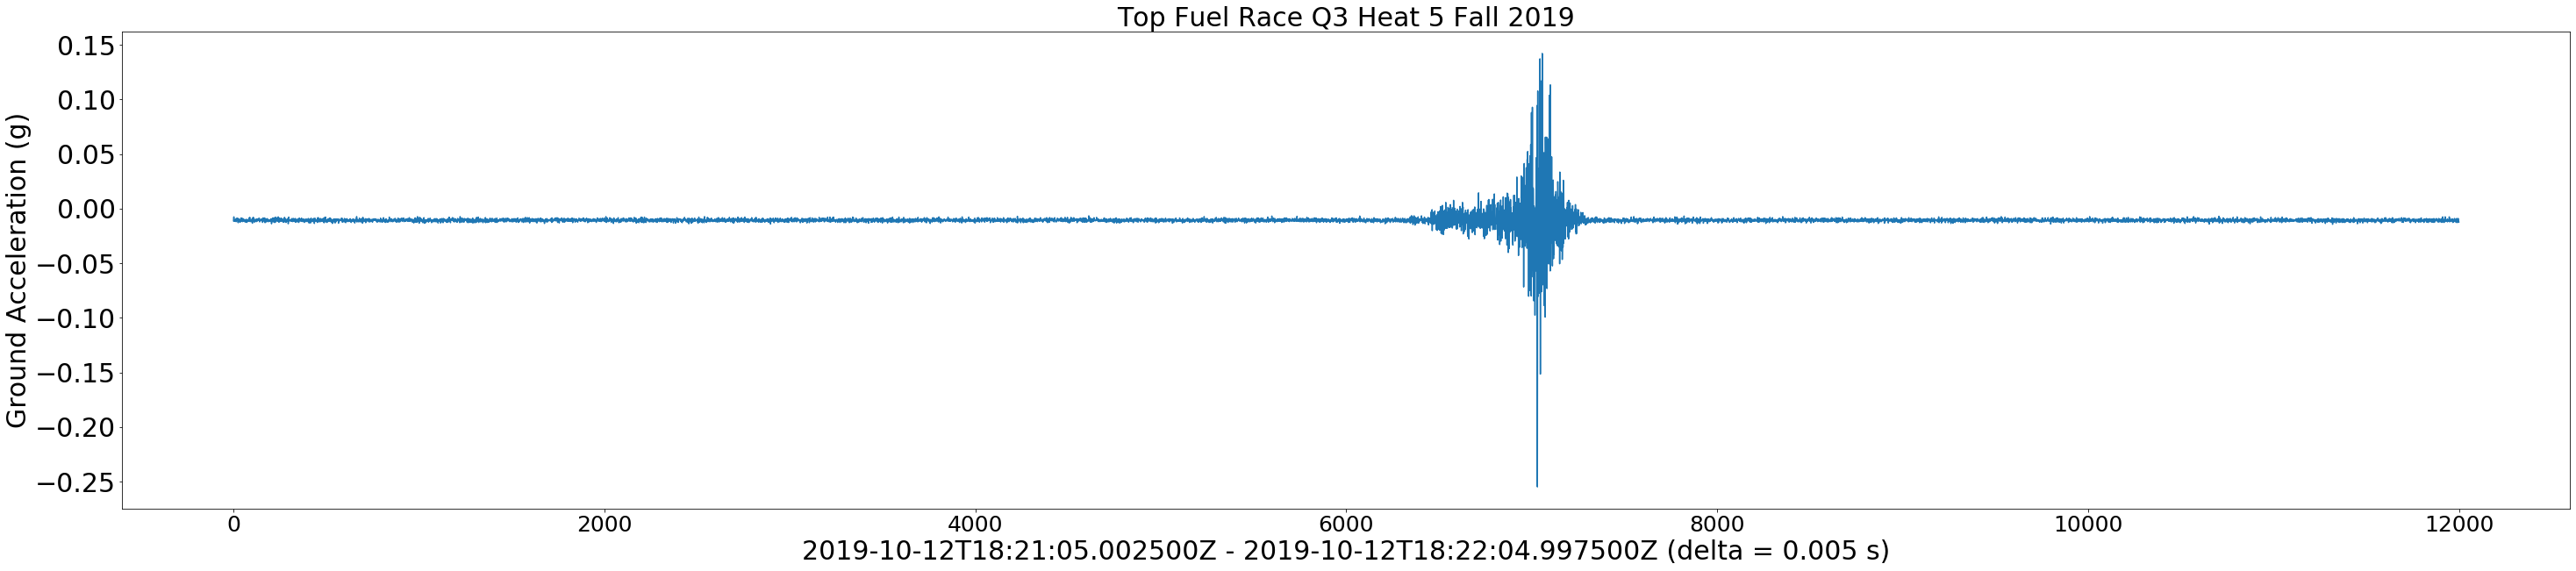

In [10]:
# Plot using matplot lib

#create figure
fig = plt.figure(figsize=(50, 10))
data = stg[0].data

start = stg[0].stats['starttime']
delta = stg[0].stats['delta']
end = stg[0].stats['endtime']
#print(start) 

# plot and label graph
plt.plot(data)
plt.title('Top Fuel Race Q3 Heat 5 Fall 2019', fontsize = 30)
plt.xlabel('2019-10-12T18:21:05.002500Z - 2019-10-12T18:22:04.997500Z (delta = 0.005 s)', fontsize = 30)
plt.ylabel('Ground Acceleration (g)', fontsize = 30)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 30)
plt.show()

2. Apply 3 point moving average FIR filter